In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

<ipython-input-1-cc32ca35feb7>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [2]:
import warnings
%matplotlib inline

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252289 entries, 0 to 252288
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   sessionID            252289 non-null  object 
 1   userID               252289 non-null  object 
 2   TARGET               252289 non-null  float64
 3   browser              252289 non-null  object 
 4   OS                   252289 non-null  object 
 5   device               252289 non-null  object 
 6   new                  252289 non-null  int64  
 7   quality              252289 non-null  float64
 8   duration             252289 non-null  float64
 9   bounced              252289 non-null  int64  
 10  transaction          252289 non-null  float64
 11  transaction_revenue  252289 non-null  float64
 12  continent            252289 non-null  object 
 13  subcontinent         252289 non-null  object 
 14  country              252289 non-null  object 
 15  traffic_source   

In [ ]:
train.isnull().sum()

sessionID                   0
userID                      0
TARGET                      0
browser                     0
OS                          0
device                      0
new                         0
quality                     0
duration                    0
bounced                     0
transaction                 0
transaction_revenue         0
continent                   0
subcontinent                0
country                     0
traffic_source              0
traffic_medium              0
keyword                137675
referral_path          161107
dtype: int64

In [ ]:
train.shape

(252289, 19)

In [ ]:
train.describe()

,TARGET,new,quality,duration,bounced,transaction,transaction_revenue
count,252289.000000,252289.000000,252289.000000,252289.000000,252289.000000,252289.000000,2.522890e+05
mean,3.592626,0.751955,3.816805,113.104253,0.493672,0.009033,9.061248e+05
std,5.509465,0.431879,11.091028,330.876019,0.499961,0.100938,2.127689e+07
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00
50%,2.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000e+00
75%,4.000000,1.000000,1.000000,71.000000,1.000000,0.000000,0.000000e+00
max,386.000000,1.000000,98.000000,11186.000000,1.000000,12.000000,3.325712e+09


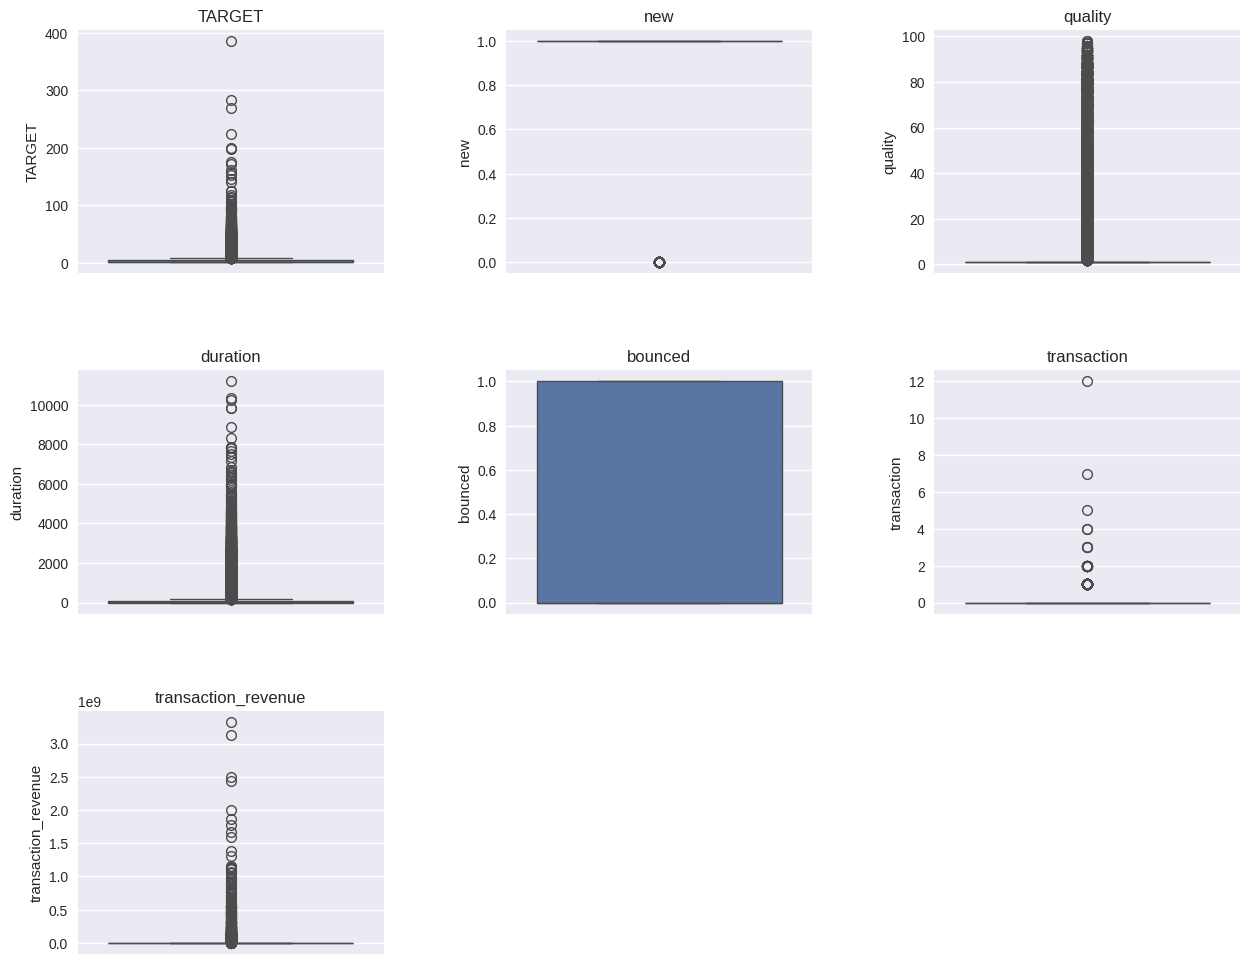

In [ ]:
num_cols = train.select_dtypes(include="number").columns
function, axes = plt.subplots(3,3, figsize=(15,12))
i = 0
for row in range(3):
    for col in range(3):
        if i<7:
            sns.boxplot(train, y=num_cols[i], ax=axes[row,col])
            axes[row,col].set_title(num_cols[i])
            i+=1
        else:
            axes[row,col].set_visible(False)

plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

In [ ]:
# num_cols

Index(['TARGET', 'new', 'quality', 'duration', 'bounced', 'transaction',
       'transaction_revenue'],
      dtype='object')

In [ ]:
# function, axes = plt.subplots(3,3, figsize=(15,12))

In [ ]:
category_cols = train.select_dtypes(include='object').columns

In [ ]:
category_cols

Index(['sessionID', 'userID', 'browser', 'OS', 'device', 'continent',
       'subcontinent', 'country', 'traffic_source', 'traffic_medium',
       'keyword', 'referral_path'],
      dtype='object')

In [ ]:
for i in range(2,len(category_cols)-2):
    print(f'{category_cols[i]}: {len(train[category_cols[i]].unique())}개')

browser: 70개
OS: 21개
device: 3개
continent: 6개
subcontinent: 23개
country: 205개
traffic_source: 168개
traffic_medium: 7개


In [ ]:
#test data
test.head()

,sessionID,userID,browser,OS,device,new,quality,duration,bounced,transaction,transaction_revenue,continent,subcontinent,country,traffic_source,traffic_medium,keyword,referral_path
0,SESSION_252289,USER_206024,Chrome,Linux,desktop,1,75.0,698.0,0,0.0,0.0,Americas,Northern America,United States,(direct),(none),NaN,Category1
1,SESSION_252290,USER_206025,Safari,iOS,tablet,0,1.0,0.0,1,0.0,0.0,Americas,Northern America,United States,google,organic,Category8,NaN
2,SESSION_252291,USER_206026,Chrome,Windows,desktop,1,1.0,33.0,0,0.0,0.0,Asia,Southern Asia,India,youtube.com,referral,NaN,Category2_Path_0082
3,SESSION_252292,USER_206027,Chrome,Android,mobile,1,1.0,76.0,0,0.0,0.0,Americas,Northern America,United States,google,organic,Category8,NaN
4,SESSION_252293,USER_206028,Internet Explorer,Windows Phone,mobile,1,2.0,372.0,0,0.0,0.0,Asia,Southern Asia,India,youtube.com,referral,NaN,Category11_Path_0088


In [ ]:
test.shape

(79786, 18)

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79786 entries, 0 to 79785
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sessionID            79786 non-null  object 
 1   userID               79786 non-null  object 
 2   browser              79786 non-null  object 
 3   OS                   79786 non-null  object 
 4   device               79786 non-null  object 
 5   new                  79786 non-null  int64  
 6   quality              79786 non-null  float64
 7   duration             79786 non-null  float64
 8   bounced              79786 non-null  int64  
 9   transaction          79786 non-null  float64
 10  transaction_revenue  79786 non-null  float64
 11  continent            79786 non-null  object 
 12  subcontinent         79786 non-null  object 
 13  country              79786 non-null  object 
 14  traffic_source       79786 non-null  object 
 15  traffic_medium       79786 non-null 

In [ ]:
test.isnull().sum()

sessionID                  0
userID                     0
browser                    0
OS                         0
device                     0
new                        0
quality                    0
duration                   0
bounced                    0
transaction                0
transaction_revenue        0
continent                  0
subcontinent               0
country                    0
traffic_source             0
traffic_medium             0
keyword                43070
referral_path          53891
dtype: int64

In [ ]:
test.describe()

,new,quality,duration,bounced,transaction,transaction_revenue
count,79786.000000,79786.000000,79786.000000,79786.000000,79786.000000,7.978600e+04
mean,0.734515,3.967576,121.550635,0.496804,0.007909,9.552892e+05
std,0.441594,11.349192,349.168791,0.499993,0.095260,2.714007e+07
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00
50%,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000e+00
75%,1.000000,1.000000,75.000000,1.000000,0.000000,0.000000e+00
max,1.000000,98.000000,9316.000000,1.000000,7.000000,4.609835e+09


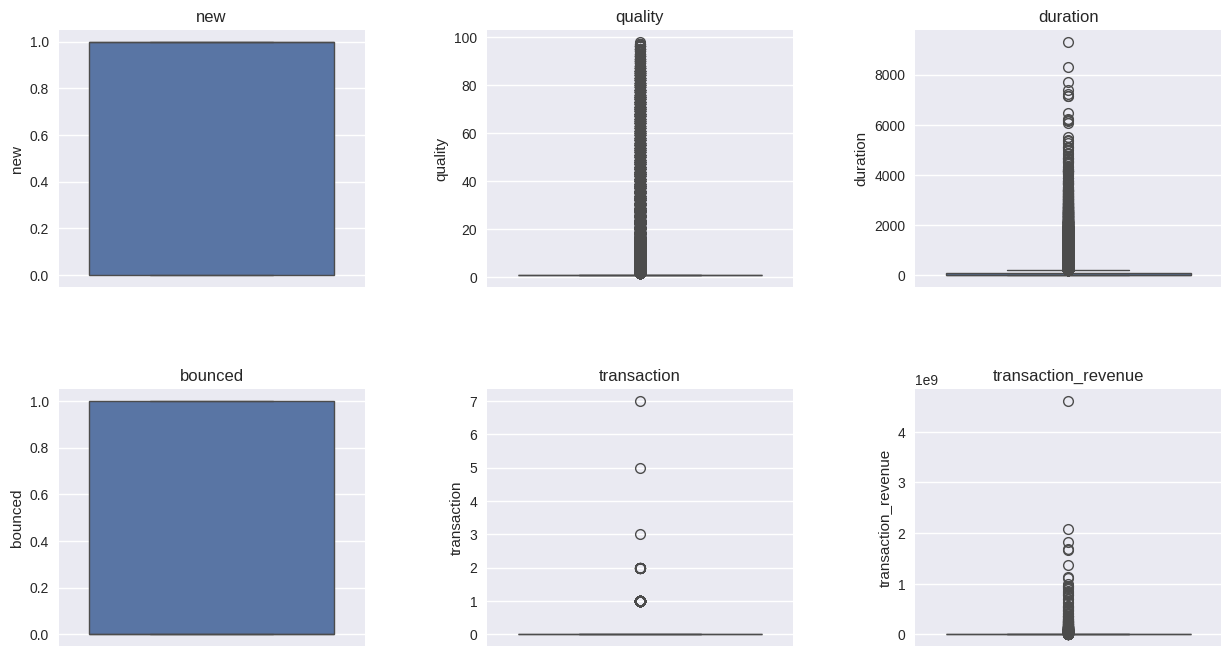

In [ ]:
test_num_cols = test.select_dtypes(include='number').columns
f,ax = plt.subplots(2,3,figsize=(15,8))

i=0
for row in range(2):
    for col in range(3):
        sns.boxplot(test, y=test_num_cols[i], ax=ax[row,col])
        ax[row,col].set_title(test_num_cols[i])
        i+=1

plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

In [ ]:
train.select_dtypes(include='number').columns

Index(['TARGET', 'new', 'quality', 'duration', 'bounced', 'transaction',
       'transaction_revenue'],
      dtype='object')

In [ ]:
train['TARGET'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 252289 entries, 0 to 252288
Series name: TARGET
Non-Null Count   Dtype  
--------------   -----  
252289 non-null  float64
dtypes: float64(1)
memory usage: 1.9 MB


In [ ]:
train['TARGET'].describe()

count    252289.000000
mean          3.592626
std           5.509465
min           1.000000
25%           1.000000
50%           2.000000
75%           4.000000
max         386.000000
Name: TARGET, dtype: float64

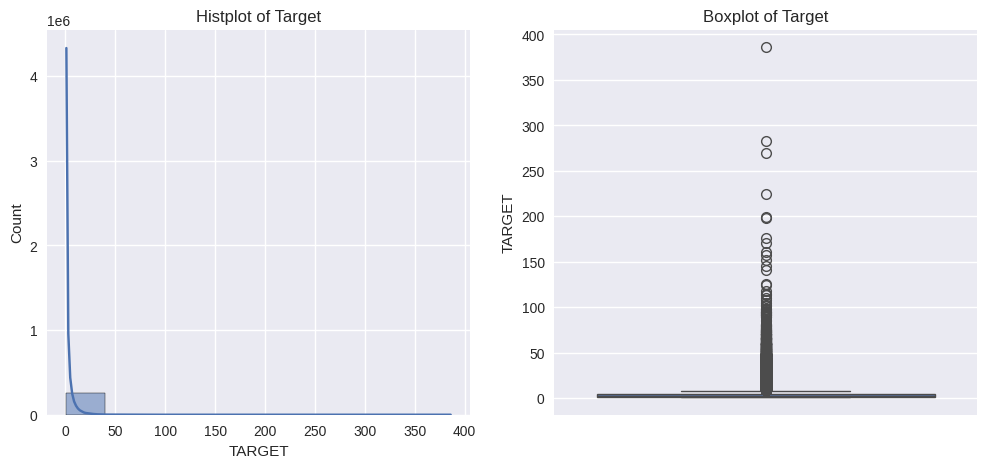

In [ ]:
f,ax = plt.subplots(1,2, figsize=(12,5))
sns.histplot(x='TARGET', data=train, bins=10, kde=True, ax=ax[0])
ax[0].set_title('Histplot of Target')
sns.boxplot(y='TARGET', data=train, ax=ax[1])
ax[1].set_title('Boxplot of Target')
plt.show()

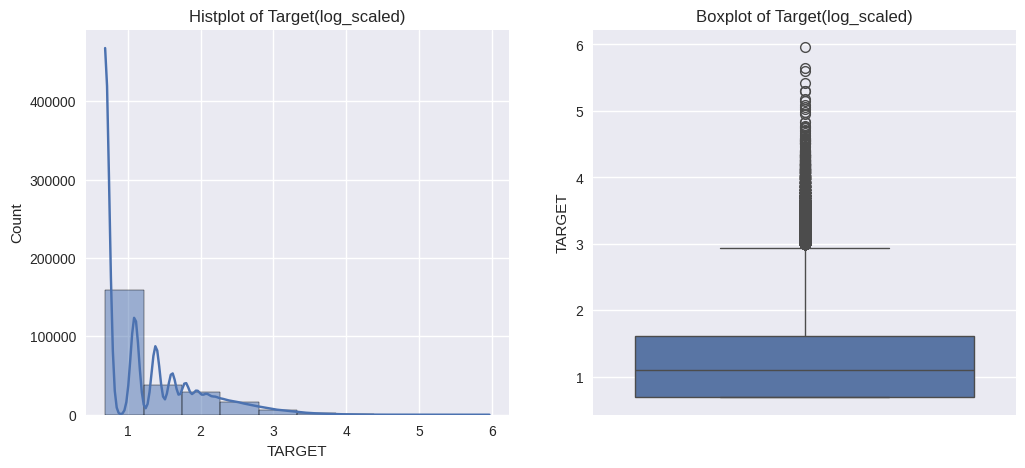

In [ ]:
new_train = train.copy()
new_train['TARGET'] = new_train['TARGET'].map(lambda i: np.log1p(i))

f,ax = plt.subplots(1,2, figsize=(12,5))
sns.histplot(x='TARGET', data=new_train, bins=10, kde=True, ax=ax[0])
ax[0].set_title('Histplot of Target(log_scaled)')
sns.boxplot(y='TARGET', data=new_train, ax=ax[1])
ax[1].set_title('Boxplot of Target(log_scaled)')
plt.show()

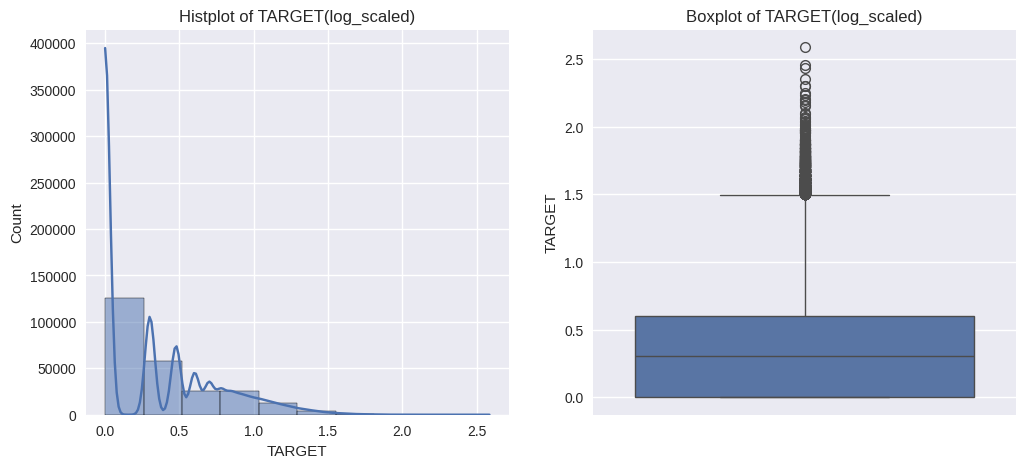

In [ ]:
another_train = train.copy()
another_train['TARGET'] = another_train['TARGET'].map(lambda i: np.log10(i))

f, ax = plt.subplots(1,2, figsize = (12,5))
sns.histplot(x='TARGET', data = another_train, bins = 10, kde = True, ax = ax[0])
ax[0].set_title('Histplot of TARGET(log_scaled)')
sns.boxplot(y='TARGET', data = another_train, ax = ax[1])
ax[1].set_title('Boxplot of TARGET(log_scaled)')
plt.show()

In [ ]:
train['new'].info()
train['new'].describe()

<class 'pandas.core.series.Series'>
RangeIndex: 252289 entries, 0 to 252288
Series name: new
Non-Null Count   Dtype
--------------   -----
252289 non-null  int64
dtypes: int64(1)
memory usage: 1.9 MB


count    252289.000000
mean          0.751955
std           0.431879
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: new, dtype: float64

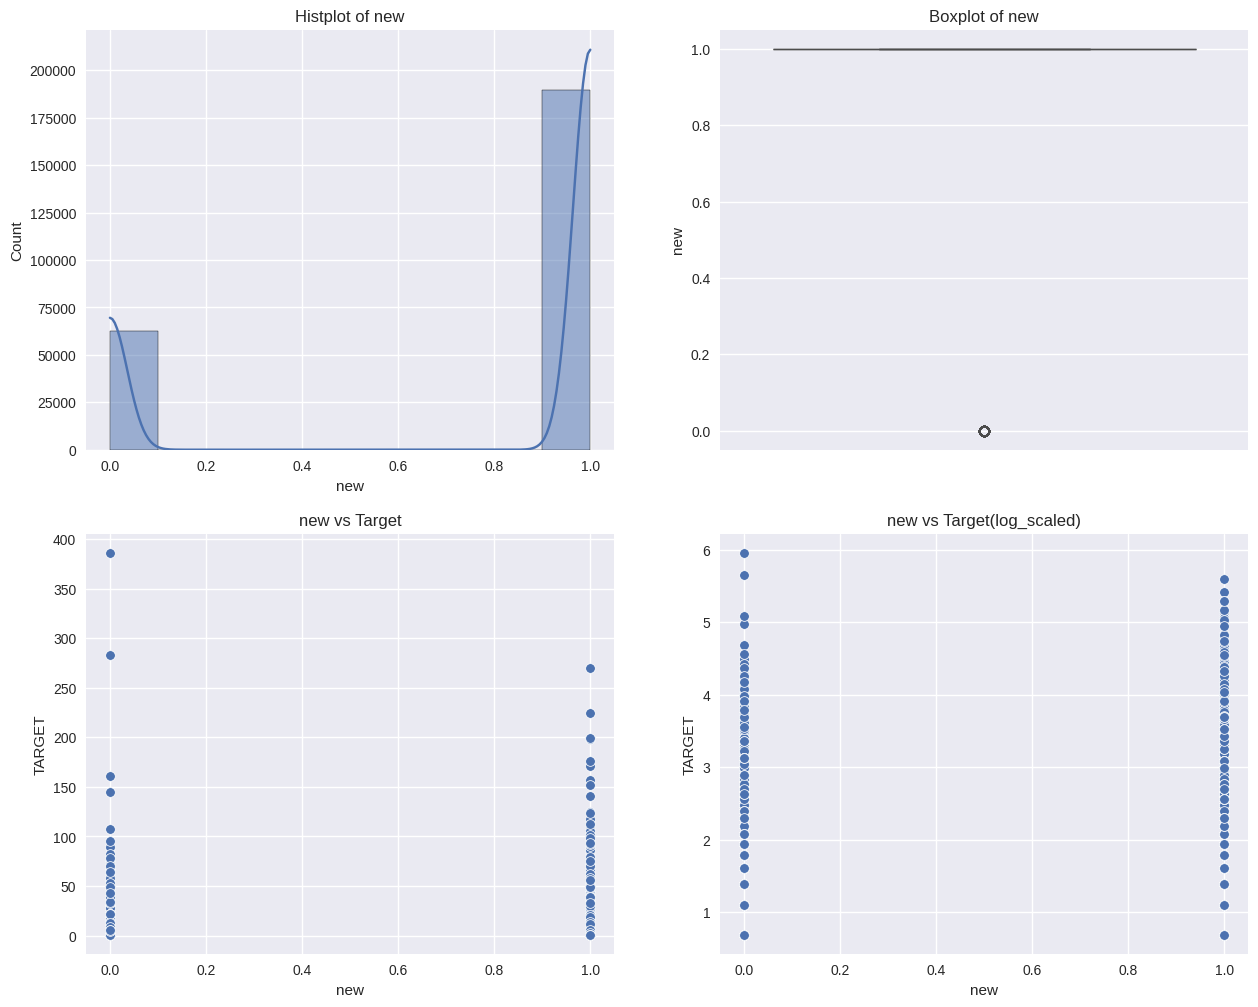

In [ ]:
f,ax = plt.subplots(2,2, figsize=(15,12))

sns.histplot(x='new', data=train, bins=10, kde=True, ax=ax[0,0])
ax[0,0].set_title('Histplot of new')
sns.boxplot(y='new', data=train, ax=ax[0,1])
ax[0,1].set_title('Boxplot of new')
sns.scatterplot(x='new', y='TARGET', data=train, ax=ax[1,0])
ax[1,0].set_title('new vs Target')

train2 = train.copy()
train2['TARGET'] = train2['TARGET'].map(lambda i:np.log1p(i))
sns.scatterplot(x='new', y='TARGET', data=train2, ax=ax[1,1])
ax[1,1].set_title('new vs Target(log_scaled)')

plt.show()

In [ ]:
train.groupby('new')[['TARGET']].agg(['count','mean','median'])

TARGET                 
      count      mean median
new                         
0     62579  4.231579    2.0
1    189710  3.381857    1.0

In [ ]:
train2.groupby('new')[['TARGET']].agg(['count', 'mean', 'median'])

TARGET                    
      count      mean    median
new                            
0     62579  1.307533  1.098612
1    189710  1.185667  0.693147

In [ ]:
train['quality'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 252289 entries, 0 to 252288
Series name: quality
Non-Null Count   Dtype  
--------------   -----  
252289 non-null  float64
dtypes: float64(1)
memory usage: 1.9 MB


In [ ]:
train['quality'].describe()

count    252289.000000
mean          3.816805
std          11.091028
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          98.000000
Name: quality, dtype: float64

Text(0.5, 1.0, 'Boxplot of quality')

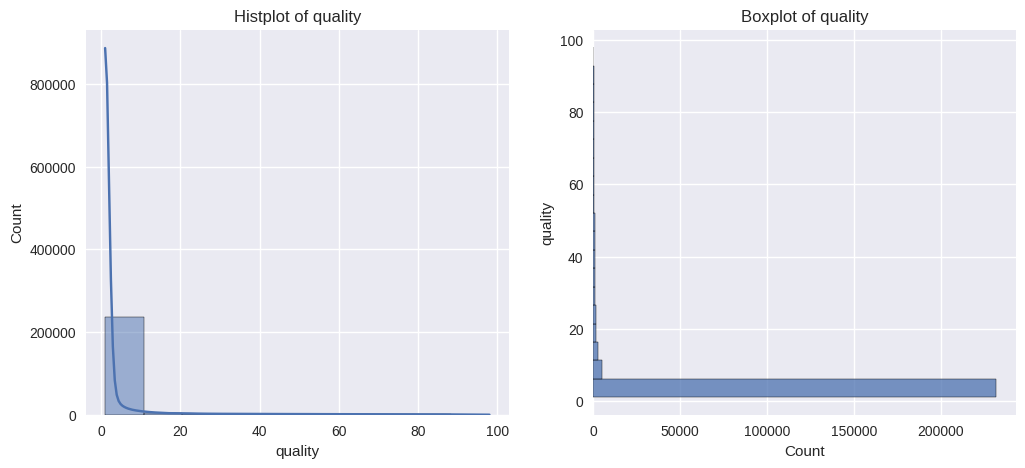

In [ ]:
f,ax = plt.subplots(1,2, figsize=(12,5))

sns.histplot(x='quality', data=train, bins=10, kde=True, ax=ax[0])
ax[0].set_title('Histplot of quality')
sns.histplot(y='quality', data=train, ax=ax[1])
ax[1].set_title('Boxplot of quality')

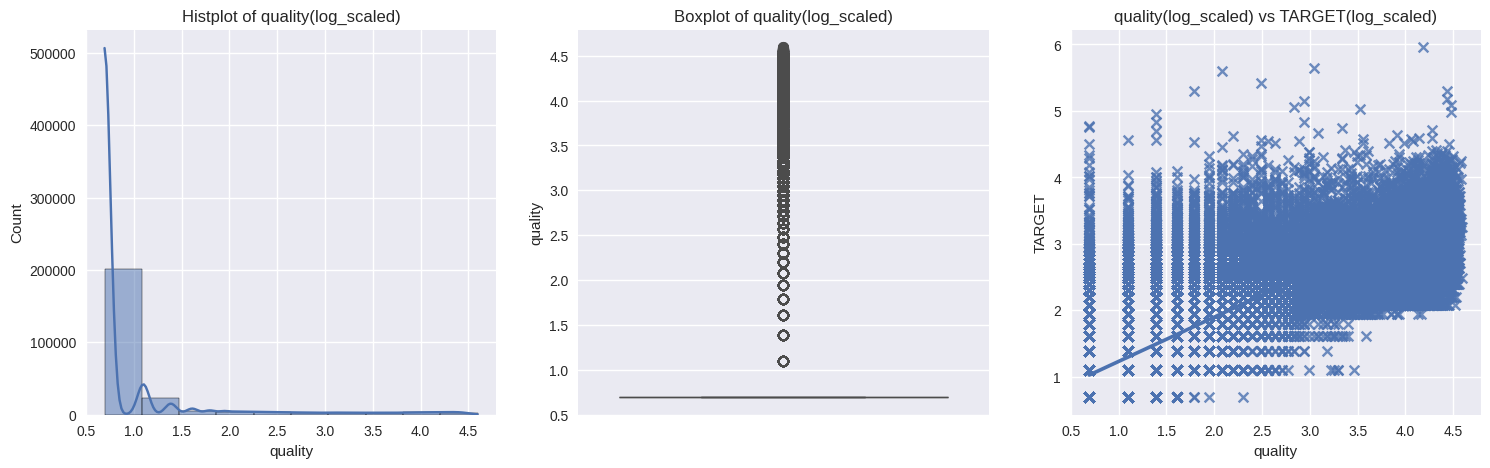

In [ ]:
train2 = train.copy()
train2['quality'] = train2['quality'].map(lambda i:np.log1p(i))
train2['TARGET'] = train2['TARGET'].map(lambda i:np.log1p(i))

f,ax = plt.subplots(1,3, figsize=(18,5))
sns.histplot(x='quality', data=train2, bins=10, kde=True, ax=ax[0])
ax[0].set_title('Histplot of quality(log_scaled)')
sns.boxplot(y='quality', data=train2, ax=ax[1])
ax[1].set_title('Boxplot of quality(log_scaled)')
sns.regplot(x='quality', y='TARGET', data=train2, marker='x', ax=ax[2])
ax[2].set_title('quality(log_scaled) vs TARGET(log_scaled)')

plt.show()

In [ ]:
train['duration'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 252289 entries, 0 to 252288
Series name: duration
Non-Null Count   Dtype  
--------------   -----  
252289 non-null  float64
dtypes: float64(1)
memory usage: 1.9 MB


In [ ]:
train['duration'].describe()

count    252289.000000
mean        113.104253
std         330.876019
min           0.000000
25%           0.000000
50%           3.000000
75%          71.000000
max       11186.000000
Name: duration, dtype: float64

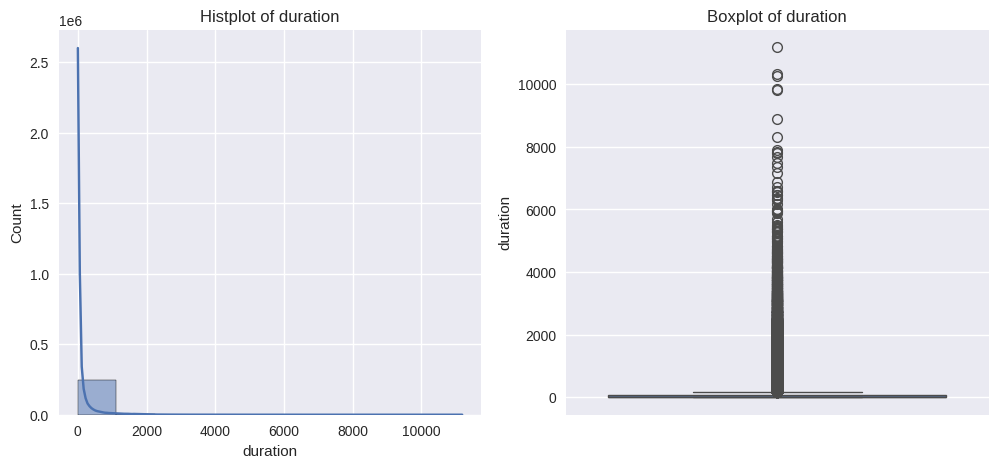

In [ ]:
f,ax = plt.subplots(1,2, figsize=(12,5))

sns.histplot(x='duration', data=train, bins=10, kde=True, ax=ax[0])
ax[0].set_title('Histplot of duration')
sns.boxplot(y='duration', data=train, ax=ax[1])
ax[1].set_title('Boxplot of duration')
plt.show()

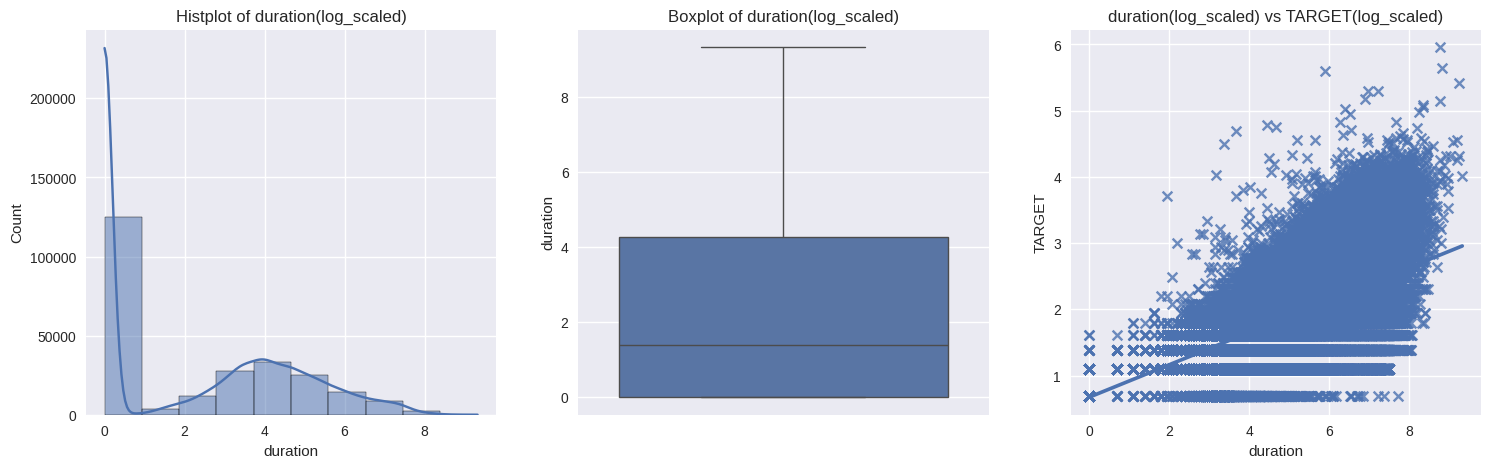

In [ ]:
train2 = train.copy()
train2['duration'] = train2['duration'].map(lambda i:np.log1p(i))
train2['TARGET'] = train2['TARGET'].map(lambda i:np.log1p(i))

f,ax = plt.subplots(1,3, figsize=(18,5))
sns.histplot(x='duration', data=train2, bins=10, kde=True, ax=ax[0])
ax[0].set_title('Histplot of duration(log_scaled)')
sns.boxplot(y='duration', data=train2, ax=ax[1])
ax[1].set_title('Boxplot of duration(log_scaled)')
sns.regplot(x='duration', y='TARGET', data=train2, marker='x', ax=ax[2])
ax[2].set_title('duration(log_scaled) vs TARGET(log_scaled)')

plt.show()

In [ ]:
train['bounced'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 252289 entries, 0 to 252288
Series name: bounced
Non-Null Count   Dtype
--------------   -----
252289 non-null  int64
dtypes: int64(1)
memory usage: 1.9 MB


In [ ]:
train['bounced'].describe()

count    252289.000000
mean          0.493672
std           0.499961
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: bounced, dtype: float64

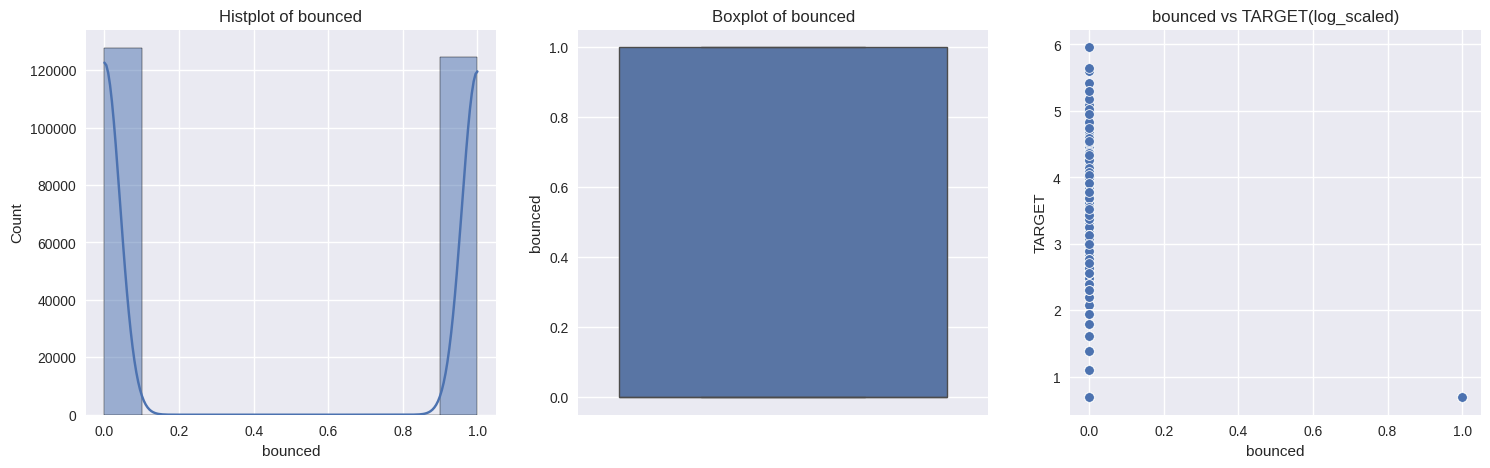

In [ ]:
f,ax = plt.subplots(1,3, figsize=(18,5))

sns.histplot(x='bounced', data=train, bins=10, kde=True, ax=ax[0])
ax[0].set_title('Histplot of bounced')
sns.boxplot(y='bounced', data=train, ax=ax[1])
ax[1].set_title('Boxplot of bounced')

# plt.show()

train3 = train.copy()
train3['TARGET'] = train3['TARGET'].map(lambda i:np.log1p(i))
sns.scatterplot(x='bounced', y='TARGET', data=train3, ax=ax[2])
ax[2].set_title('bounced vs TARGET(log_scaled)')

plt.show()

In [ ]:
train3.groupby('bounced')['TARGET'].agg(['mean', 'median'])

,mean,median
bounced,,
0,1.725576,1.609438
1,0.693147,0.693147


In [ ]:
train['transaction'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 252289 entries, 0 to 252288
Series name: transaction
Non-Null Count   Dtype  
--------------   -----  
252289 non-null  float64
dtypes: float64(1)
memory usage: 1.9 MB


In [ ]:
train['transaction'].describe()

count    252289.000000
mean          0.009033
std           0.100938
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          12.000000
Name: transaction, dtype: float64

Text(0.5, 1.0, 'transaction vs TARGET(log_scaled)')

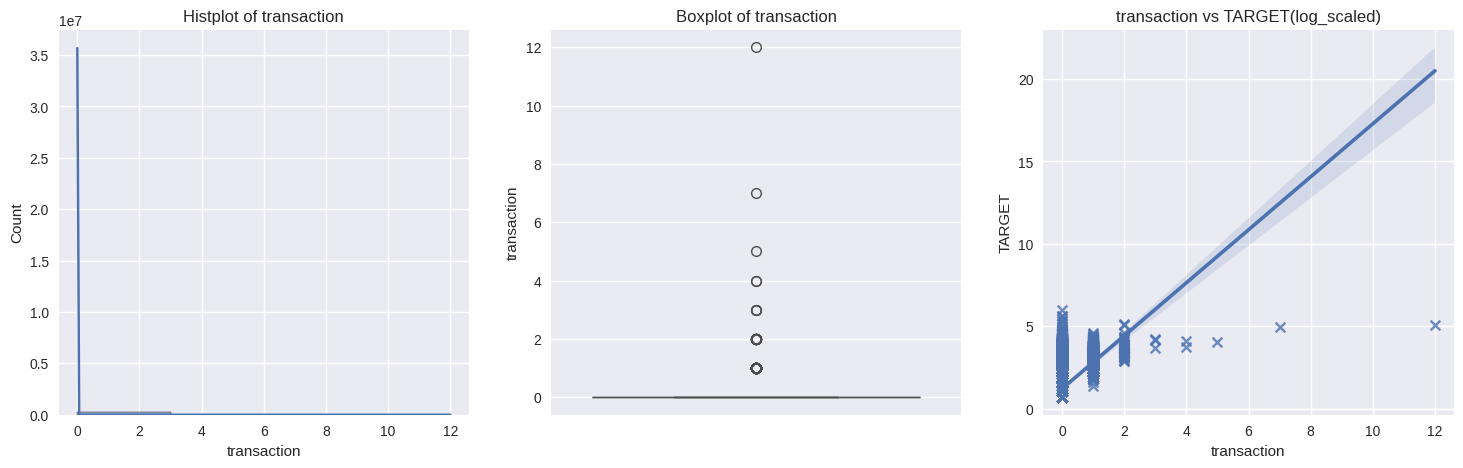

In [ ]:
f,ax = plt.subplots(1,3, figsize=(18,5))

sns.histplot(x='transaction', data=train, bins=4, kde=True, ax=ax[0])
ax[0].set_title('Histplot of transaction')
sns.boxplot(y='transaction', data=train, ax=ax[1])
ax[1].set_title('Boxplot of transaction')

# plt.show()

train4 = train.copy()
train4['TARGET'] = train4['TARGET'].map(lambda i:np.log1p(i))
sns.regplot(x='transaction', y='TARGET', data=train4, marker='x', ax=ax[2])
ax[2].set_title('transaction vs TARGET(log_scaled)')

In [ ]:
train['transaction_revenue'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 252289 entries, 0 to 252288
Series name: transaction_revenue
Non-Null Count   Dtype  
--------------   -----  
252289 non-null  float64
dtypes: float64(1)
memory usage: 1.9 MB


In [ ]:
train['transaction_revenue'].describe()

count    2.522890e+05
mean     9.061248e+05
std      2.127689e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.325712e+09
Name: transaction_revenue, dtype: float64

<ipython-input-30-8ad872941d62>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(new_train.corr(), annot=True)


<Axes: >

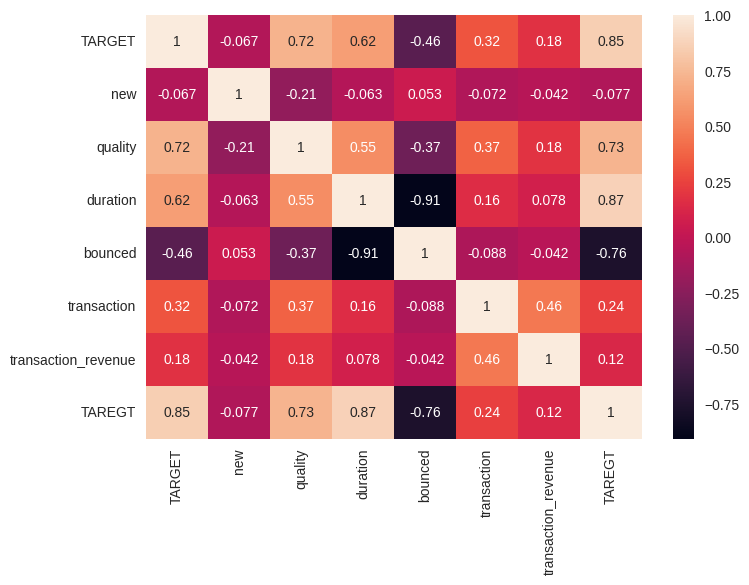

In [ ]:
#correlation
new_train = train.copy()
new_train['TAREGT'] = new_train['TARGET'].map(lambda i:np.log1p(i))
new_train['quality'] = new_train['quality'].map(lambda i:np.log1p(i))
new_train['duration'] = new_train['duration'].map(lambda i:np.log1p(i))

data = np.random.rand(7,7)
mask2 = np.triu(np.ones_like(data, dtype=bool))

sns.heatmap(new_train.corr(), annot=True)

In [ ]:
# mask
train.select_dtypes(include='object').columns

Index(['sessionID', 'userID', 'browser', 'OS', 'device', 'continent',
       'subcontinent', 'country', 'traffic_source', 'traffic_medium',
       'keyword', 'referral_path'],
      dtype='object')

In [ ]:
# sns.heatmap(new_train.corr(), annot=True, mask=mask)
# XGBRegressor
# from sklearn.datasets import load_boston
# boston = load_boston()
# df = pd.DataFrame(boston.data, columns=boston.feature_names)
train['browser'].unique()

array(['Chrome', 'Samsung Internet', 'Firefox', 'Opera',
       'Safari (in-app)', 'Edge', 'Safari', 'Android Webview',
       'UC Browser', 'Internet Explorer', 'Opera Mini', 'BlackBerry',
       'Android Browser', 'Amazon Silk', 'Coc Coc', 'YaBrowser',
       'Nintendo Browser', 'Nokia Browser', 'MRCHROME', 'Puffin',
       'Mozilla Compatible Agent', 'Maxthon', '+Simple Browser',
       'Apple-iPhone7C2', 'Playstation Vita Browser',
       'osee2unifiedRelease', 'SAMSUNG-SM-B355E Opera', 'DESKTOP', 'Iron',
       'Browser', 'rpfanjzoxyemsgbtichqkudwlv',
       'cajrnbtvqwfkolzyxushpdgime', 'wvsmagudcqeytijorlhxnfzkbp',
       'efkaxnbyohqtspzlvcwrjmigdu', 'bsfnwveckhgpdoyjxmizruqtla',
       'Mozilla', 'Konqueror', 'Netscape', 'Amazon.com', 'SeaMonkey',
       ';__CT_JOB_ID__:76fd1acb-e365-43c0-b967-908bcf5d5b59;',
       'eosutpkiahjzvdgcwxlmyfqbrn', 'cnwmpegudakrqzljtvfxohbysi',
       'fspmihbxzowgnuctrqykjlvade', 'YE',
       ';__CT_JOB_ID__:7e575295-571e-4e82-9254-7f2c8bbb9183;

In [ ]:
len(train['browser'].unique())

70

In [ ]:
train['browser'].value_counts(ascending=False).head(20)/train.shape[0]

Chrome                      0.691251
Safari                      0.141461
Android Webview             0.054917
Firefox                     0.033438
Internet Explorer           0.018126
Edge                        0.014674
Samsung Internet            0.012196
Opera Mini                  0.012054
Safari (in-app)             0.007908
Opera                       0.005276
UC Browser                  0.003571
YaBrowser                   0.001593
Amazon Silk                 0.001019
Coc Coc                     0.000817
Mozilla Compatible Agent    0.000491
Android Browser             0.000436
Puffin                      0.000218
MRCHROME                    0.000059
Nokia Browser               0.000052
BlackBerry                  0.000052
Name: browser, dtype: float64

<ipython-input-37-2ec261944bda>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train5['browser_trans'][train5['browser'] == 'Chrome'] = 'Chrome'


<Axes: xlabel='browser_trans', ylabel='TARGET'>

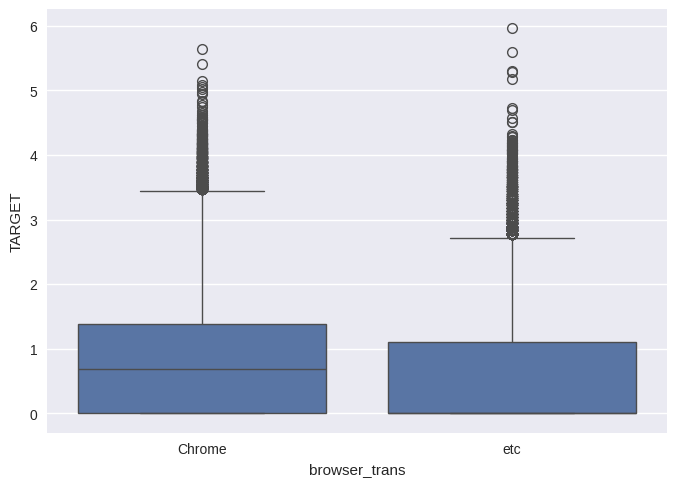

In [ ]:
train5 = train.copy()
train5['browser_trans'] = 'etc'
train5['browser_trans'][train5['browser'] == 'Chrome'] = 'Chrome'
train5['TARGET'] = train5['TARGET'].map(lambda i:np.log(i) if i>0 else 0)
sns.boxplot(y='TARGET', x='browser_trans', data=train5)

In [ ]:
train5.groupby('browser_trans')['TARGET'].agg(['mean', 'median'])

,mean,median
browser_trans,,
Chrome,0.822504,0.693147
etc,0.590044,0.000000


In [ ]:
train['OS'].unique()

array(['Macintosh', 'Windows', 'Android', 'iOS', 'Linux', 'Tizen',
       'Chrome OS', 'BlackBerry', '(not set)', 'Xbox', 'Samsung',
       'Windows Phone', 'OS/2', 'Nintendo 3DS', 'Playstation Vita',
       'FreeBSD', 'SunOS', 'Nintendo WiiU', 'Firefox OS', 'SymbianOS',
       'Nokia'], dtype=object)

In [ ]:
train['OS'].value_counts(ascending=False)/train.shape[0]

Windows             0.349278
Macintosh           0.239075
Android             0.205598
iOS                 0.118031
Linux               0.037901
Chrome OS           0.036553
(not set)           0.010274
Tizen               0.001272
Samsung             0.001027
Windows Phone       0.000507
OS/2                0.000143
Xbox                0.000123
BlackBerry          0.000115
Playstation Vita    0.000036
Nintendo 3DS        0.000024
Firefox OS          0.000016
FreeBSD             0.000012
SunOS               0.000004
Nintendo WiiU       0.000004
SymbianOS           0.000004
Nokia               0.000004
Name: OS, dtype: float64

<ipython-input-44-81cf3744b26e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train6['OS_trans'][train6['OS'] == 'Windows'] = 'Windows'
<ipython-input-44-81cf3744b26e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train6['OS_trans'][train6['OS'] == 'Macintosh'] = 'Macintosh'
<ipython-input-44-81cf3744b26e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train6['OS_trans'][train6['OS'] == 'Android'] = 'Android'
<ipython-input-44-

<Axes: xlabel='OS_trans', ylabel='TARGET'>

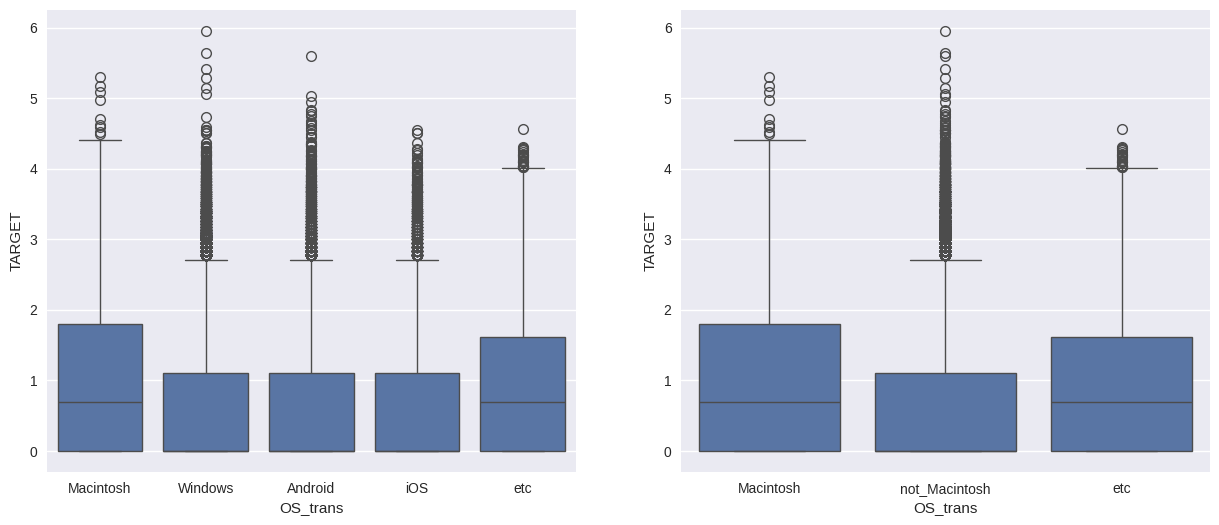

In [ ]:
f,ax = plt.subplots(1,2, figsize=(15,6))

train6 = train.copy()
train6['OS_trans'] = 'etc'
train6['OS_trans'][train6['OS'] == 'Windows'] = 'Windows'
train6['OS_trans'][train6['OS'] == 'Macintosh'] = 'Macintosh'
train6['OS_trans'][train6['OS'] == 'Android'] = 'Android'
train6['OS_trans'][train6['OS'] == 'iOS'] = 'iOS'
train6['TARGET'] = train6['TARGET'].map(lambda i:np.log(i) if i>0 else 0)
sns.boxplot(y='TARGET', x='OS_trans', data=train6, ax=ax[0])


train6 = train.copy()
train6['OS_trans'] = 'etc'
train6['OS_trans'][train6['OS'] == 'Windows'] = 'not_Macintosh'
train6['OS_trans'][train6['OS'] == 'Macintosh'] = 'Macintosh'
train6['OS_trans'][train6['OS'] == 'Android'] = 'not_Macintosh'
train6['OS_trans'][train6['OS'] == 'iOS'] = 'not_Macintosh'
train6['TARGET'] = train6['TARGET'].map(lambda i: np.log(i) if i>0 else 0)
sns.boxplot(y='TARGET', x='OS_trans', data=train6, ax=ax[1])

In [ ]:
train6.groupby('OS_trans')['TARGET'].agg(['mean', 'median'])

,mean,median
OS_trans,,
Macintosh,0.976646,0.693147
etc,0.907321,0.693147
not_Macintosh,0.649986,0.000000


In [ ]:
train['device'].value_counts()

desktop    167133
mobile      76460
tablet       8696
Name: device, dtype: int64

In [ ]:
train['device'].value_counts(ascending=False)/train.shape[0]

desktop    0.662466
mobile     0.303065
tablet     0.034468
Name: device, dtype: float64

<ipython-input-53-257cc1a6a0e5>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train2['device_trans'][train2['device'] == 'desktop'] = 'desktop'


<Axes: xlabel='device_trans', ylabel='TARGET'>

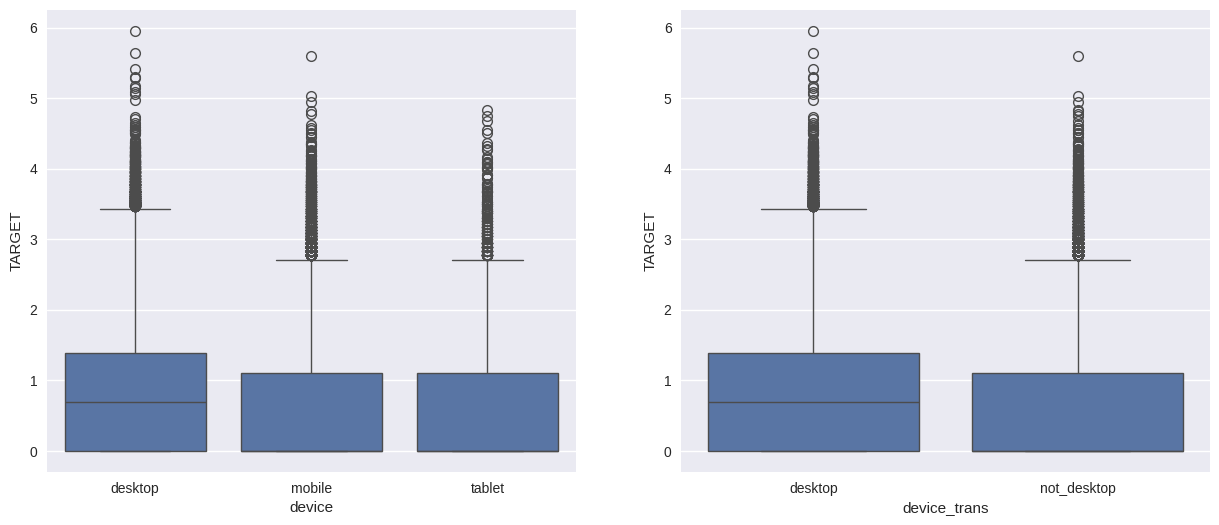

In [ ]:
train2 = train.copy()
f,ax = plt.subplots(1,2, figsize=(15,6))

train2['TARGET'] = train2['TARGET'].map(lambda i: np.log(i) if i>0 else 0)
sns.boxplot(y='TARGET', x='device', data=train2, ax=ax[0])

train2['device_trans'] = 'not_desktop'
train2['device_trans'][train2['device'] == 'desktop'] = 'desktop'
sns.boxplot(y='TARGET', x='device_trans', data=train2, ax=ax[1])

In [ ]:
train2.groupby('device')['TARGET'].agg(['mean', 'median'])

,mean,median
device,,
desktop,0.811189,0.693147
mobile,0.623366,0.000000
tablet,0.708663,0.000000


In [ ]:
train['continent'].value_counts()

Americas     126506
Asia          57254
Europe        53748
Africa        10514
Oceania        3931
(not set)       336
Name: continent, dtype: int64

In [ ]:
train['traffic_source'].value_counts()

google                  116007
(direct)                 59026
youtube.com              52871
analytics.google.com      7609
Partners                  5369
                         ...  
google.ie                    1
qc.search.yahoo.com          1
earth.google.com             1
br.search.yahoo.com          1
calendar.google.com          1
Name: traffic_source, Length: 168, dtype: int64

In [ ]:
len(train['traffic_source'].unique())

168

In [ ]:
train['traffic_source'].value_counts(ascending=False)/train.shape[0]

google                  0.459818
(direct)                0.233962
youtube.com             0.209565
analytics.google.com    0.030160
Partners                0.021281
                          ...   
google.ie               0.000004
qc.search.yahoo.com     0.000004
earth.google.com        0.000004
br.search.yahoo.com     0.000004
calendar.google.com     0.000004
Name: traffic_source, Length: 168, dtype: float64

In [ ]:
train2 = train.copy()
train2['traffic_source'] = train['traffic_source'].apply(lambda x : 'google' if
                                                         'google' in x.lower() else x)
train2['traffic_source'] = train['traffic_source'].apply(lambda x : 'youtube'if 'youtube' in x.lower() else x)
train2['traffic_source'].value_counts(ascending=False)/train2.shape[0]

google                  0.459818
(direct)                0.233962
youtube                 0.209633
analytics.google.com    0.030160
Partners                0.021281
                          ...   
kidrex.org              0.000004
qc.search.yahoo.com     0.000004
earth.google.com        0.000004
br.search.yahoo.com     0.000004
calendar.google.com     0.000004
Name: traffic_source, Length: 166, dtype: float64

<ipython-input-19-78cb6ad44735>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train2['traffic_source_trans'][train2['traffic_source'] == 'google'] = 'google'
<ipython-input-19-78cb6ad44735>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train2['traffic_source_trans'][train2['traffic_source'] == '(direct)'] = '(direct)'
<ipython-input-19-78cb6ad44735>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train2['traffic_source_trans'][t

<Axes: xlabel='traffic_source_trans', ylabel='TARGET'>

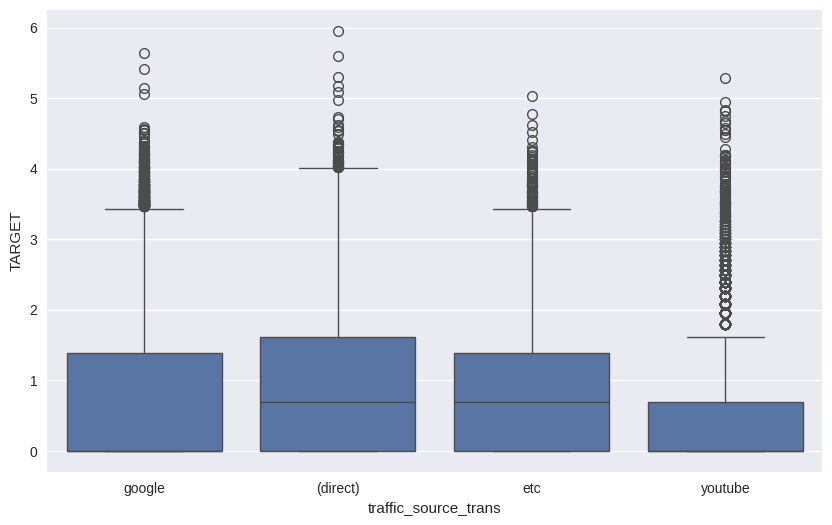

In [ ]:
f,ax = plt.subplots(1,1, figsize=(10,6))

train2['TARGET'] = train2['TARGET'].map(lambda i : np.log(i) if i>0 else 0)
train2['traffic_source_trans'] = 'etc'
train2['traffic_source_trans'][train2['traffic_source'] == 'google'] = 'google'
train2['traffic_source_trans'][train2['traffic_source'] == '(direct)'] = '(direct)'
train2['traffic_source_trans'][train2['traffic_source'] == 'youtube'] = 'youtube'
sns.boxplot(y='TARGET', x='traffic_source_trans', data=train2)

In [ ]:
train2.groupby('traffic_source_trans')['TARGET'].agg(['mean', 'median'])

,mean,median
traffic_source_trans,,
(direct),0.969999,0.693147
etc,0.719957,0.693147
google,0.777767,0.000000
youtube,0.460898,0.000000


In [ ]:
train['traffic_medium'].value_counts()

organic      107370
referral      70047
(none)        59022
cpc            9978
affiliate      5365
cpm             501
(not set)         6
Name: traffic_medium, dtype: int64

In [ ]:
len(train['traffic_medium'].value_counts())

7

In [ ]:
train['traffic_medium'].value_counts(ascending=False)/train2.shape[0]

organic      0.425583
referral     0.277646
(none)       0.233946
cpc          0.039550
affiliate    0.021265
cpm          0.001986
(not set)    0.000024
Name: traffic_medium, dtype: float64

<ipython-input-28-8c05da36d75b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train4['traffic_medium_trans'][train4['traffic_medium'] == 'organic'] = 'organic_cpc'
<ipython-input-28-8c05da36d75b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train4['traffic_medium_trans'][train4['traffic_medium'] == 'referral'] = 'referral'
<ipython-input-28-8c05da36d75b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train4['traffic_medium_tr

<Axes: xlabel='traffic_medium_trans', ylabel='TARGET'>

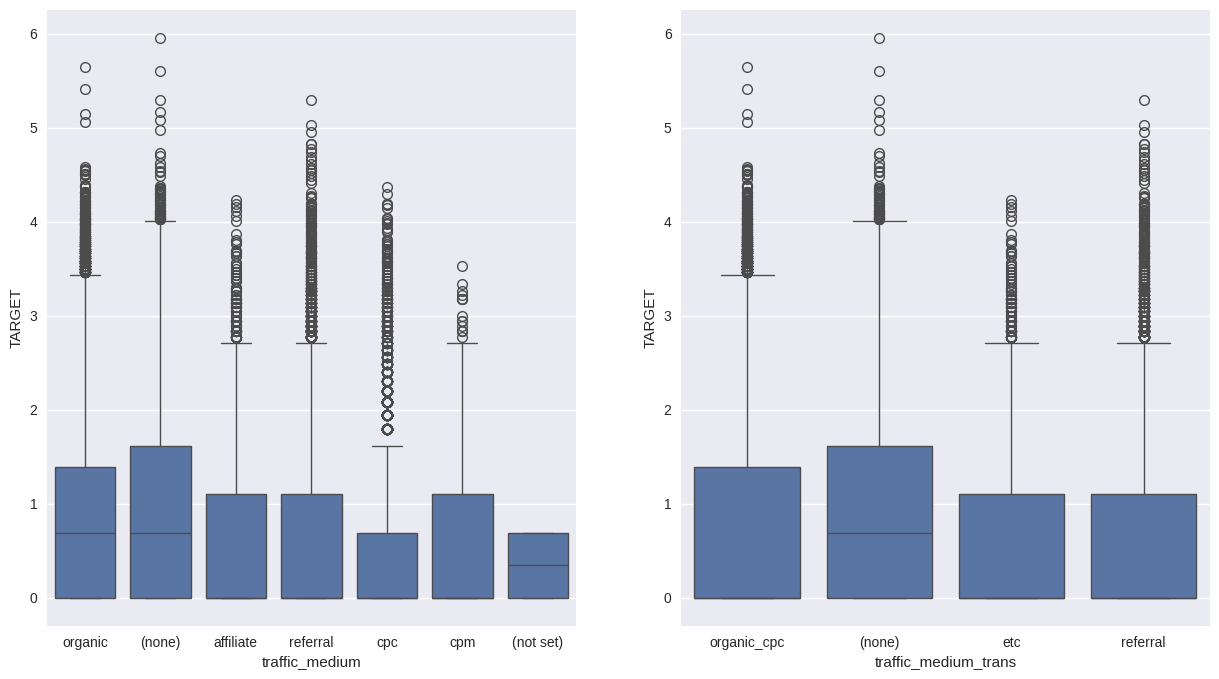

In [ ]:
train4 = train.copy()
f,ax = plt.subplots(1,2, figsize=(15,8))

train4['TARGET'] = train4['TARGET'].map(lambda i : np.log(i) if i>0 else 0)
sns.boxplot(y='TARGET', x='traffic_medium', data=train4, ax=ax[0])

train4['traffic_medium_trans'] = 'etc'
train4['traffic_medium_trans'][train4['traffic_medium'] == 'organic'] = 'organic_cpc'
train4['traffic_medium_trans'][train4['traffic_medium'] == 'referral'] = 'referral'
train4['traffic_medium_trans'][train4['traffic_medium'] == '(none)'] = '(none)'
train4['traffic_medium_trans'][train4['traffic_medium'] == 'cpc'] = 'organic_cpc'
sns.boxplot(y='TARGET', x='traffic_medium_trans', data=train4, ax=ax[1])

In [ ]:
train4.groupby('traffic_medium_trans')['TARGET'].agg(['mean', 'median'])

,mean,median
traffic_medium_trans,,
(none),0.970065,0.693147
etc,0.648327,0.000000
organic_cpc,0.776562,0.000000
referral,0.531235,0.000000


In [ ]:
train5 = train.copy()

In [ ]:
train['TARGET'].value_counts()

1.0      126008
2.0       33690
3.0       23636
4.0       14291
5.0       10743
          ...  
125.0         1
171.0         1
270.0         1
81.0          1
199.0         1
Name: TARGET, Length: 117, dtype: int64

In [ ]:
train5['TARGET'] = train5['TARGET'].map(lambda i : np.log1p(i))

In [ ]:
train5['TARGET'].value_counts()

0.693147    126008
1.098612     33690
1.386294     23636
1.609438     14291
1.791759     10743
             ...  
4.836282         1
5.147494         1
5.602119         1
4.406719         1
5.298317         1
Name: TARGET, Length: 117, dtype: int64

In [ ]:
train5['quality'].value_counts()

1.0     201310
2.0      16717
3.0       6073
4.0       3331
5.0       2246
         ...  
93.0        25
95.0        22
96.0        10
97.0         5
98.0         2
Name: quality, Length: 98, dtype: int64

In [ ]:
train5['quality'] = train5['quality'].map(lambda i : np.log1p(i))
from sklearn.preprocessing import MinMaxScaler
mns_quality = MinMaxScaler()
train5['quality'] = mns_quality.fit_transform(train5[['quality']])

In [ ]:
train5['quality']

0         0.803566
1         0.000000
2         0.000000
3         0.000000
4         0.000000
            ...   
252284    0.000000
252285    0.000000
252286    0.103913
252287    0.000000
252288    0.281553
Name: quality, Length: 252289, dtype: float64

In [ ]:
train5['duration'] = train5['duration'].map(lambda i : np.log1p(i))

from sklearn.preprocessing import MinMaxScaler
mns_duration = MinMaxScaler()
train5['duration'] = mns_duration.fit_transform(train5[['duration']])

In [ ]:
train5['duration'].value_counts()

0.000000    124906
0.275135      1289
0.290485      1255
0.315842      1243
0.266549      1220
             ...  
0.855369         1
0.879091         1
0.871741         1
0.812722         1
0.808520         1
Name: duration, Length: 2972, dtype: int64

In [ ]:
mns_transaction = MinMaxScaler()
train5['transaction'] = mns_transaction.fit_transform(train5[['transaction']])

In [ ]:
train5['transaction'].value_counts()

0.000000    250081
0.083333      2162
0.166667        38
0.250000         3
0.333333         2
0.416667         1
0.583333         1
1.000000         1
Name: transaction, dtype: int64

In [ ]:
train5['transaction_revenue'] = train5['transaction_revenue'].map(lambda i : np.log1p(i))
mns_transaction_revenue = MinMaxScaler()
train5['transaction_revenue'] = mns_transaction_revenue.fit_transform(train5[['transaction_revenue']])

In [ ]:
train5['transaction_revenue'].value_counts()

0.000000    250087
0.802104        31
0.804987        27
0.799027        26
0.801101        25
             ...  
0.875395         1
0.863060         1
0.835541         1
0.823094         1
0.909928         1
Name: transaction_revenue, Length: 1218, dtype: int64

In [ ]:
# from sklearn.datasets import load_boston
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/kt%26g/kt%26g.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   분기          5 non-null      object 
 1   매출액         5 non-null      object 
 2   영업이익        5 non-null      object 
 3   영업이익(발표기준)  5 non-null      object 
 4   세전계속사업이익    5 non-null      object 
 5   당기순이익       5 non-null      object 
 6   당기순이익(지배)   5 non-null      object 
 7   당기순이익(비지배)  5 non-null      int64  
 8   자산총계        5 non-null      object 
 9   부채총계        5 non-null      object 
 10  자본총계        5 non-null      object 
 11  자본총계(지배)    5 non-null      object 
 12  자본총계(비지배)   2 non-null      float64
 13  자본금         5 non-null      object 
 14  영업활동현금흐름    5 non-null      object 
 15  투자활동현금흐름    5 non-null      object 
 16  재무활동현금흐름    5 non-null      object 
 17  영업이익률       5 non-null      float64
 18  순이익률        5 non-null      float64
 19  ROE(%)      5 non-null      float

In [ ]:
df.isnull().sum()

분기            0
매출액           0
영업이익          0
영업이익(발표기준)    0
세전계속사업이익      0
당기순이익         0
당기순이익(지배)     0
당기순이익(비지배)    0
자산총계          0
부채총계          0
자본총계          0
자본총계(지배)      0
자본총계(비지배)     3
자본금           0
영업활동현금흐름      0
투자활동현금흐름      0
재무활동현금흐름      0
영업이익률         0
순이익률          0
ROE(%)        0
ROA(%)        0
부채비율          0
자본유보율         0
EPS(원)        0
PER(배)        0
dtype: int64

In [ ]:
df['ROA(%)'].value_counts()

9.37    1
9.95    1
9.96    1
9.79    1
9.40    1
Name: ROA(%), dtype: int64

In [ ]:
df['ROE(%)'].value_counts()

12.35    1
12.67    1
12.39    1
13.05    1
12.20    1
Name: ROE(%), dtype: int64

In [ ]:
df['j-value'] = df['ROE(%)'] + df['ROA(%)']

In [ ]:
df['j-value']

0    21.72
1    22.62
2    22.35
3    22.84
4    21.60
Name: j-value, dtype: float64

In [ ]:
# df['자산']

In [ ]:
c